# Relu and Tanh

/Users/rahatrihan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


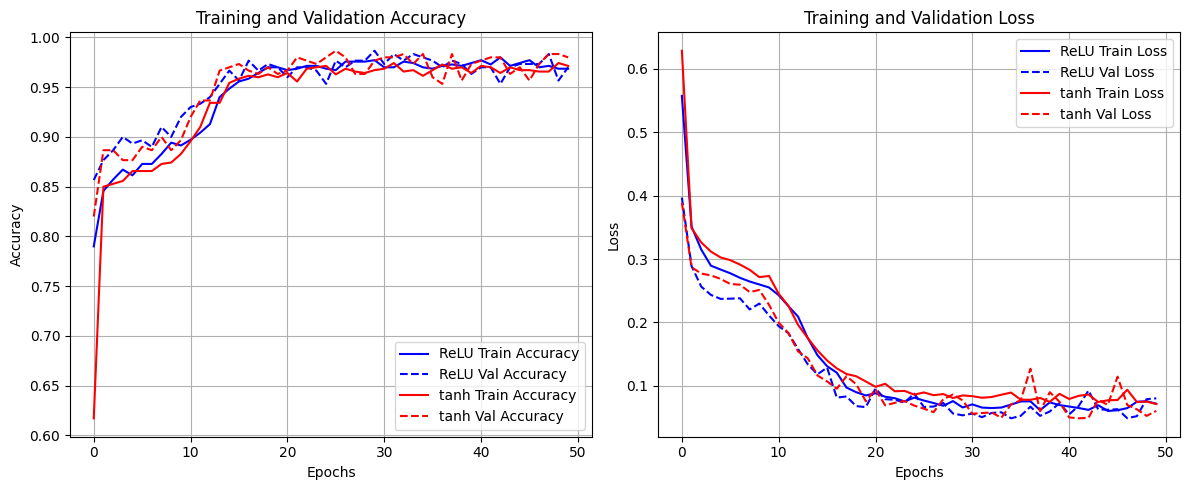

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Generate a simple synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Build a simple neural network
def build_model(activation_function):
    model = Sequential()
    model.add(Dense(16, input_dim=2, activation=activation_function))  # Hidden layer 1
    model.add(Dense(8, activation=activation_function))                # Hidden layer 2
    model.add(Dense(1, activation='sigmoid'))                         # Output layer
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 3: Train models with ReLU and tanh
relu_model = build_model('relu')
tanh_model = build_model('tanh')

# Train the ReLU model
relu_history = relu_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

# Train the tanh model
tanh_history = tanh_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)

# Step 4: Plot the comparison
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(relu_history.history['accuracy'], label='ReLU Train Accuracy', color='blue')
plt.plot(relu_history.history['val_accuracy'], label='ReLU Val Accuracy', linestyle='--', color='blue')
plt.plot(tanh_history.history['accuracy'], label='tanh Train Accuracy', color='red')
plt.plot(tanh_history.history['val_accuracy'], label='tanh Val Accuracy', linestyle='--', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(relu_history.history['loss'], label='ReLU Train Loss', color='blue')
plt.plot(relu_history.history['val_loss'], label='ReLU Val Loss', linestyle='--', color='blue')
plt.plot(tanh_history.history['loss'], label='tanh Train Loss', color='red')
plt.plot(tanh_history.history['val_loss'], label='tanh Val Loss', linestyle='--', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()